# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [4]:
print(cities)

['barra do garcas', 'geraldton', 'nizhneyansk', 'ankazobe', 'boa vista', 'yellowknife', 'ushuaia', 'hermanus', 'atuona', 'arraial do cabo', 'busselton', 'port elizabeth', 'dzhusaly', 'puerto escondido', 'katsuura', 'isangel', 'jarjis', 'lumphat', 'albany', 'mahebourg', 'saint-joseph', 'felidhoo', 'samarai', 'hilo', 'ancud', 'robertsport', 'bethel', 'codrington', 'new norfolk', 'hobart', 'intipuca', 'bandarbeyla', 'jamestown', 'puerto ayora', 'thompson', 'fowa', 'buique', 'lahij', 'ternate', 'puri', 'saint-philippe', 'port hardy', 'barentsburg', 'rikitea', 'saint george', 'castro', 'georgetown', 'belyy yar', 'saskylakh', 'makaha', 'okhotsk', 'san policarpo', 'qaanaaq', 'hambantota', 'marcona', 'kedainiai', 'nome', 'panjab', 'palmer', 'samusu', 'talmenka', 'boldumsaz', 'muncar', 'leningradskiy', 'poso', 'sentyabrskiy', 'touros', 'hohhot', 'aloleng', 'punta arenas', 'mar del plata', 'san patricio', 'ponta do sol', 'poum', 'coahuayana', 'agapovka', 'kapaa', 'nikolskoye', 'takhtamygda', 'fa

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print(weather_api_key)

65e67b99df7e4d1a7b6d4e19ea6783d8


In [6]:
#making calls: https://openweathermap.org/current#data
#establish base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#build query url
weather_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q=" 

#get sample weather of city
samp_weather = requests.get(weather_url + "fortuna").json()
samp_weather


{'coord': {'lon': -124.1573, 'lat': 40.5982},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 60.55,
  'feels_like': 59.16,
  'temp_min': 58.98,
  'temp_max': 66.18,
  'pressure': 1017,
  'humidity': 61},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 279, 'gust': 11.99},
 'clouds': {'all': 75},
 'dt': 1633559745,
 'sys': {'type': 2,
  'id': 2040243,
  'country': 'US',
  'sunrise': 1633529905,
  'sunset': 1633571434},
 'timezone': -25200,
 'id': 5563839,
 'name': 'Fortuna',
 'cod': 200}

In [7]:
#set lists
city_name = []
country = []
city_id = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

#loop through cities
for city in cities:
    
    #query
    city_data = requests.get(weather_url + city).json()
    
    try:
        city_name.append(city_data['name'])
        country.append(city_data['sys']['country'])
        city_id.append(city_data["id"])
        latitude.append(city_data['coord']['lat'])
        longitude.append(city_data['coord']['lon'])
        temperature.append(city_data['main']['temp'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        
        print(f"{city},{city_data['id']} found! Appending stats")
        
    except:
        #append null
        print(f"{city} not found! NaN")
        pass

barra do garcas,3470709 found! Appending stats
geraldton,2070998 found! Appending stats
nizhneyansk not found! NaN
ankazobe,1072849 found! Appending stats
boa vista,3664980 found! Appending stats
yellowknife,6185377 found! Appending stats
ushuaia,3833367 found! Appending stats
hermanus,3366880 found! Appending stats
atuona,4020109 found! Appending stats
arraial do cabo,3471451 found! Appending stats
busselton,2075265 found! Appending stats
port elizabeth,964420 found! Appending stats
dzhusaly not found! NaN
puerto escondido,3520994 found! Appending stats
katsuura,2112309 found! Appending stats
isangel,2136825 found! Appending stats
jarjis not found! NaN
lumphat,1830377 found! Appending stats
albany,5106841 found! Appending stats
mahebourg,934322 found! Appending stats
saint-joseph,6690296 found! Appending stats
felidhoo not found! NaN
samarai,2132606 found! Appending stats
hilo,5855927 found! Appending stats
ancud,3899695 found! Appending stats
robertsport,2274275 found! Appending stat

lakes entrance,2160735 found! Appending stats
severo-kurilsk,2121385 found! Appending stats
sakakah,102527 found! Appending stats
flinders,6255012 found! Appending stats
steinbach,2828737 found! Appending stats
andover,2657324 found! Appending stats
longyearbyen,2729907 found! Appending stats
margate,2643044 found! Appending stats
henties bay,3356832 found! Appending stats
general pico,3855075 found! Appending stats
barrow,5880054 found! Appending stats
faya,110690 found! Appending stats
coquimbo,3893629 found! Appending stats
luoyang,1801792 found! Appending stats
zyryanskoye,1484892 found! Appending stats
nanortalik,3421765 found! Appending stats
agirish,1512101 found! Appending stats
manassas,4771401 found! Appending stats
talah not found! NaN
celestun,3531368 found! Appending stats
pisco,3932145 found! Appending stats
richards bay,962367 found! Appending stats
kolokani,2454955 found! Appending stats
tautira,4033557 found! Appending stats
maniitsoq,3421982 found! Appending stats
sao

florianopolis,6323121 found! Appending stats
emerald,2167426 found! Appending stats
djougou,2394560 found! Appending stats
otane,2185329 found! Appending stats
saint-francois,2980080 found! Appending stats
tasiilaq,3424607 found! Appending stats
malwan not found! NaN
college,5859699 found! Appending stats
khani,610864 found! Appending stats
kokopo,2093685 found! Appending stats
amurzet,2027740 found! Appending stats
necochea,3430443 found! Appending stats
ostrovnoy,556268 found! Appending stats
acapulco,3533462 found! Appending stats
port lincoln,2063036 found! Appending stats
batemans bay,2176639 found! Appending stats
lagos,2332453 found! Appending stats
conceicao do araguaia,3401845 found! Appending stats
serik,301101 found! Appending stats
alanya,324190 found! Appending stats
manggar,1636426 found! Appending stats
kinshasa,2314302 found! Appending stats
zahesi,611093 found! Appending stats
oudtshoorn,967106 found! Appending stats
daru,2098329 found! Appending stats
panzhihua,692946

In [8]:
#df
weather_data = pd.DataFrame({"City" : pd.Series(city_name),
            "Country" : pd.Series(country),
            "City ID" : pd.Series(city_id),
            "Latitude" : pd.Series(latitude),
            "Longitude" : pd.Series(longitude),
            "temperature" : pd.Series(temperature),
            "humidity" : pd.Series(humidity),
            "cloudiness" : pd.Series(cloudiness),
            "wind speed" : pd.Series(wind_speed)
            })

weather_data 
        


,City,Country,City ID,Latitude,Longitude,temperature,humidity,cloudiness,wind speed
0,Barra do Garças,BR,3470709,-15.8900,-52.2567,95.58,41,20,5.75
1,Geraldton,AU,2070998,-28.7667,114.6000,39.61,93,0,5.75
2,Ankazobe,MG,1072849,-18.3167,47.1167,59.41,65,98,1.99
3,Boa Vista,BR,3664980,2.8197,-60.6733,91.38,49,75,6.91
4,Yellowknife,CA,6185377,62.4560,-114.3525,40.35,89,90,1.99
...,...,...,...,...,...,...,...,...,...
563,Chulym,RU,1507679,55.0997,80.9572,32.09,80,99,6.13
564,Wajir,KE,178443,1.7471,40.0573,77.18,64,54,15.37
565,Lazarev,RU,2123836,52.2250,141.5131,41.99,57,93,5.68
566,Santa Lucía,ES,2511150,27.9117,-15.5407,64.85,73,20,16.11


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Save the updated dataframe as a csv
weather_data.to_csv("Resources/city_data.csv", encoding="utf-8", index=False)
weather_data.head()

,City,Country,City ID,Latitude,Longitude,temperature,humidity,cloudiness,wind speed
0,Barra do Garças,BR,3470709,-15.8900,-52.2567,95.58,41,20,5.75
1,Geraldton,AU,2070998,-28.7667,114.6000,39.61,93,0,5.75
2,Ankazobe,MG,1072849,-18.3167,47.1167,59.41,65,98,1.99
3,Boa Vista,BR,3664980,2.8197,-60.6733,91.38,49,75,6.91
4,Yellowknife,CA,6185377,62.4560,-114.3525,40.35,89,90,1.99


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
humidity_100 = weather_data.loc[weather_data["humidity"] <100]
humidity_100

,City,Country,City ID,Latitude,Longitude,temperature,humidity,cloudiness,wind speed
0,Barra do Garças,BR,3470709,-15.8900,-52.2567,95.58,41,20,5.75
1,Geraldton,AU,2070998,-28.7667,114.6000,39.61,93,0,5.75
2,Ankazobe,MG,1072849,-18.3167,47.1167,59.41,65,98,1.99
3,Boa Vista,BR,3664980,2.8197,-60.6733,91.38,49,75,6.91
4,Yellowknife,CA,6185377,62.4560,-114.3525,40.35,89,90,1.99
...,...,...,...,...,...,...,...,...,...
563,Chulym,RU,1507679,55.0997,80.9572,32.09,80,99,6.13
564,Wajir,KE,178443,1.7471,40.0573,77.18,64,54,15.37
565,Lazarev,RU,2123836,52.2250,141.5131,41.99,57,93,5.68
566,Santa Lucía,ES,2511150,27.9117,-15.5407,64.85,73,20,16.11


In [22]:
#  Get the indices of cities that have humidity over 100%.
#index = humidity_100.index
#index

In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#clean_city_data = weather_data.dropna[(weather_data["humidity"] != )]

In [11]:
humidity_100.dtypes

City            object
Country         object
City ID          int64
Latitude       float64
Longitude      float64
temperature    float64
humidity         int64
cloudiness       int64
wind speed     float64
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

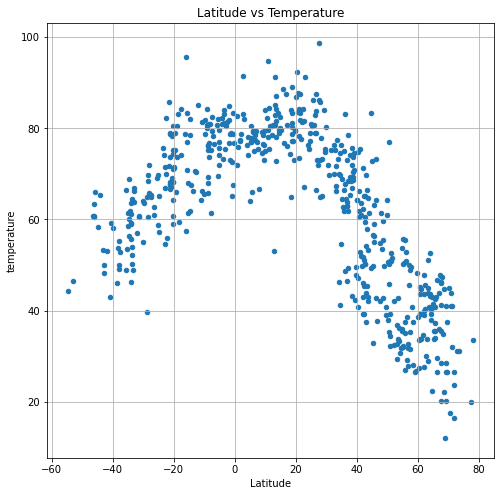

In [12]:
humidity_100.plot(kind="scatter", x="Latitude", y="temperature", grid=True, figsize=(8, 8),
                  title="Latitude vs Temperature")

plt.savefig("Resources/LatvsTemp.png")

## Latitude vs. Humidity Plot

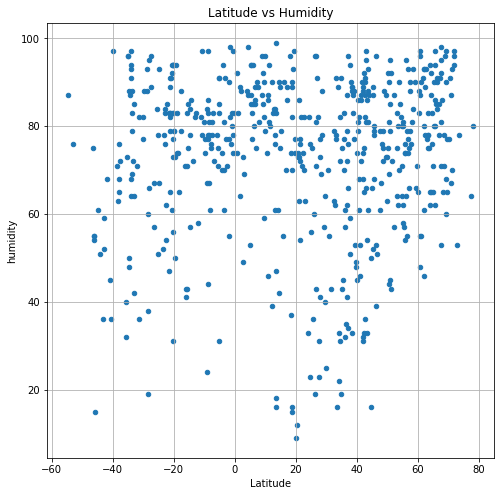

In [13]:
humidity_100.plot(kind="scatter", x="Latitude", y="humidity", grid=True, figsize=(8, 8),
                  title="Latitude vs Humidity")

plt.savefig("Resources/LatvsHumid.png")

## Latitude vs. Cloudiness Plot

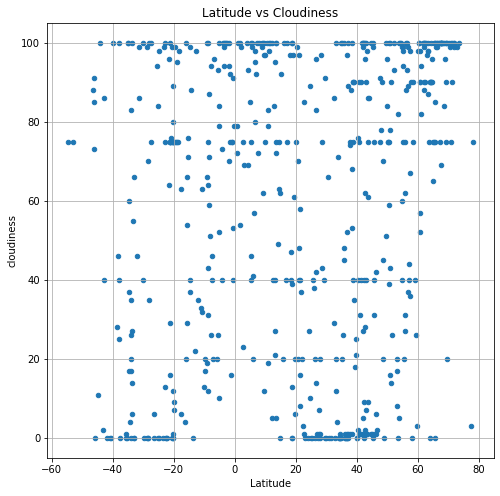

In [14]:
humidity_100.plot(kind="scatter", x="Latitude", y="cloudiness", grid=True, figsize=(8, 8),
                  title="Latitude vs Cloudiness")

plt.savefig("Resources/LatvsCloud.png")

## Latitude vs. Wind Speed Plot

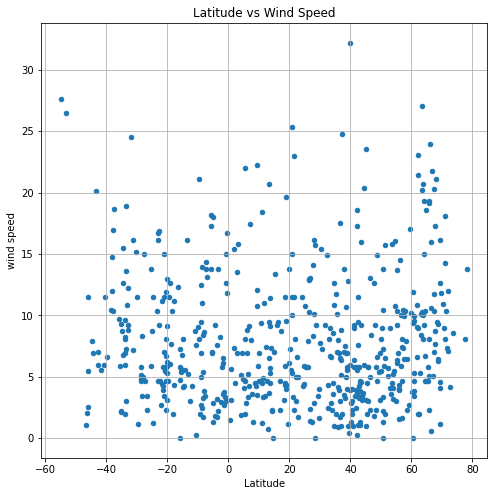

In [15]:
humidity_100.plot(kind="scatter", x="Latitude", y="wind speed", grid=True, figsize=(8, 8),
                  title="Latitude vs Wind Speed")

plt.savefig("Resources/LatvsWind.png")

## Linear Regression

In [16]:
north_hem = humidity_100.loc[humidity_100["Latitude"] >= 0]
south_hem = humidity_100.loc[humidity_100["Latitude"] < 0]
east_hem = humidity_100.loc[humidity_100["Longitude"] >= 0]
west_hem = humidity_100.loc[humidity_100["Longitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7339331346752649


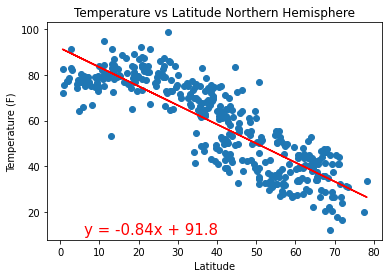

<Figure size 432x288 with 0 Axes>

In [17]:
# Add the linear regression equation and line to plot
x_values = north_hem['Latitude']
y_values = north_hem['temperature']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsTemp_LinReg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5431018322002011


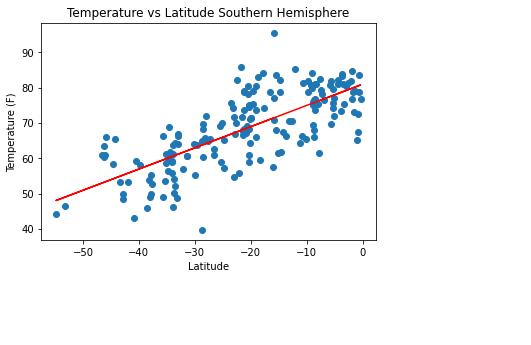

<Figure size 432x288 with 0 Axes>

In [18]:
# Add the linear regression equation and line to plot
x_values = south_hem['Latitude']
y_values = south_hem['temperature']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()


plt.savefig("Resources/South_LatvsTemp_LinReg.png")

#### Eastern Hemisphere - Max Temp vs. Longitude Linear Regression 

The r-squared is: 0.005117010296261758


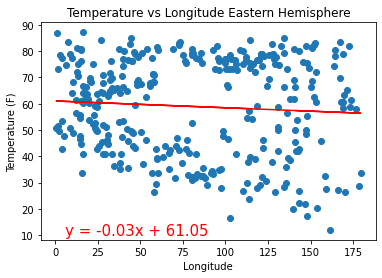

<Figure size 432x288 with 0 Axes>

In [19]:
# Add the linear regression equation and line to plot
x_values = east_hem['Longitude']
y_values = east_hem['temperature']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Longitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Longitude Eastern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()


plt.savefig("Resources/East_LatvsTemp_LinReg.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13883068485966296


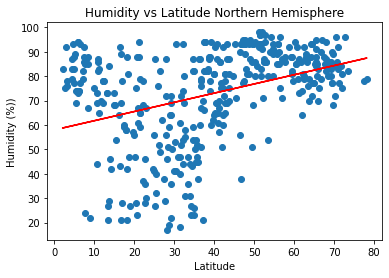

<Figure size 432x288 with 0 Axes>

In [32]:
# Add the linear regression equation and line to plot
x_values = north_hem['Latitude']
y_values = north_hem['humidity']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.title('Humidity vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsHumid_LinReg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08964010538631383


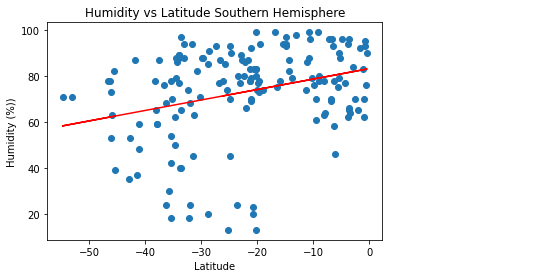

<Figure size 432x288 with 0 Axes>

In [33]:
# Add the linear regression equation and line to plot
x_values = south_hem['Latitude']
y_values = south_hem['humidity']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.title('Humidity vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/South_LatvsHumid_LinReg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08655338429428056


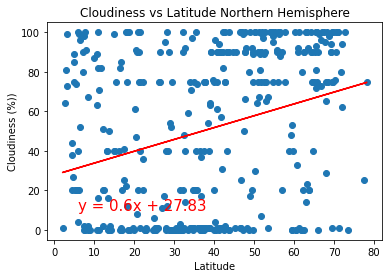

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = north_hem['Latitude']
y_values = north_hem['cloudiness']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.title('Cloudiness vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsCloud_LinReg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18780196264933602


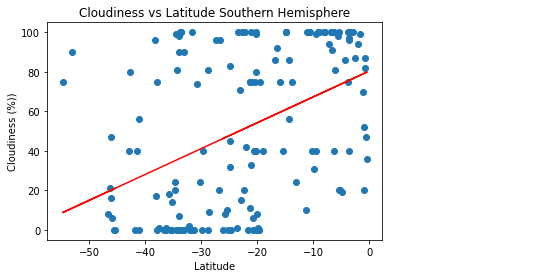

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = south_hem['Latitude']
y_values = south_hem['cloudiness']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.title('Cloudiness vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/South_LatvsCloud_LinReg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0005654511899553861


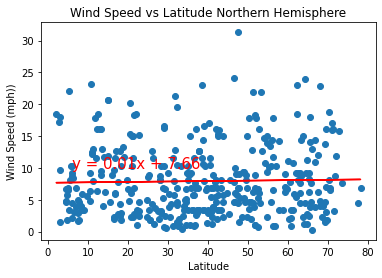

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = north_hem['Latitude']
y_values = north_hem['wind speed']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.title('Wind Speed vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsWind_LinReg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06990885056369327


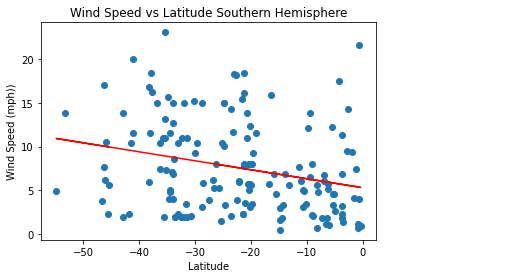

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = south_hem['Latitude']
y_values = south_hem['wind speed']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.title('Wind Speed vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/South_LatvsWind_LinReg.png")